### EDA

In [1]:
import warnings

from pathlib import Path
from typing import Literal

import nibabel as nib
import numpy as np
import pandas as pd

from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
data_dir = Path("../data")
train_generated_dir = data_dir / "generated_part1_nii_gz"
train_real_dir = data_dir / 'real_nii_gz'
test_dir = data_dir / "patch-the-planet-test-data"

In [3]:
train_generated_data = [nib.load(path) for path in list(train_generated_dir.glob("*.nii.gz"))]
train_real_data = [nib.load(path) for path in list(train_real_dir.glob("*.nii.gz"))]

In [4]:
train_generated_data[0]

Generated Image


<img style="width: 50%;" src="../images/slicer_generated.png">
<img style="width: 50%;" src="../images/slicer_generated_2.png">

Real Image 1

<img style="width: 50%;" src="../images/real_data.png">

Real Image (other volume)

<img style="width: 50%;" src="../images/real_data_other.png">

# EDA - Exploratory Data Analysis

## Co warto zrobić?

* Przeprowadźcie analizę wymiarów zestawu danych, uwzględniając liczbę woluminów sejsmicznych oraz charakterystyki przestrzenne każdego woluminu.
* Może warto porównać dane wygenerowane z prawdziwymi danymi, żeby zrozumieć jakie są różnice między nimi. Dla przykładu jakieś basic statystyki jak takie jak średnia, mediana i odchylenie standardowe. 
* Można wygerenerować ilustracyjne przekroju i zobaczyć jak się mają ich statystyki do całego woluminu. Może lepiej brać górne części woluminów, a może dolne lub środkowe lub jeszcze jakąś inną kombinację.
* Można ocenić standardowe 25% brakujących sekcji i zbadaj, jak wpływa on na ogólną strukturę woluminów sejsmicznych.
* Można poszukać jakiś współzależności pomiędzy woluminami prawdziwymi i wygenerowanymi.
* Przede wszystkim poogladajcie sobie te dane w Slicer i zobaczcie jak wyglądają. Zwróćcie uwagę na różnice w teksturze, kształcie, jasności, itp. Te różnice mogą być ważne w kontekście problemu, który chcecie rozwiązać, więc warto się zastanowić jakie cechy są ważne, bo te woluminy w przypadku prawdziwych danych mogą być bardzo różne i zresztą są.
* Weźcie sobie na przykład jakieś charakterystyczne slicy w tych woluminach i zróbcie histogramy. 
* Nie musicie patrzyć jaki jest spacing w tych woluminach i jaki shape mają. Te pliki początkowo było w formacie .npy i Wojtek dla wygody zamienił je na .nii.gz wiec nie będziecie mieli informacji o spacingu, a shape jest chyba taki sam dla wszystkich woluminów.


In [5]:
print('real data length -', len(train_real_data))
print('generated data length -', len(train_generated_data))

real data length - 50
generated data length - 26


In [6]:
example = train_generated_data[0]
print(example.header)
print('Are headers the same for both generated and real data? -', train_real_data[0].header == train_generated_data[0].header)
print('Data shape -', example.shape)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [   3  300  300 1259    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          :

Z zadania wynika, że wszystkie woluminy mają taki sam rozmiar.

In [8]:
one = nib.load(train_real_dir / '6p4df9g53k.nii.gz')
two = nib.load(train_real_dir / '5r641ploia.nii.gz')

In [9]:
first = np.array(one.dataobj)
second = np.array(two.dataobj)

In [12]:
second.mean()

-0.17686631365281089

In [27]:
list(train_real_dir.glob("*.nii.gz"))

[WindowsPath('../data/real_nii_gz/0kamixt53o.nii.gz'),
 WindowsPath('../data/real_nii_gz/17rmv3n4eo.nii.gz'),
 WindowsPath('../data/real_nii_gz/219aytwjxh.nii.gz'),
 WindowsPath('../data/real_nii_gz/2y78s5aweq.nii.gz'),
 WindowsPath('../data/real_nii_gz/5ifd2rtzm6.nii.gz'),
 WindowsPath('../data/real_nii_gz/5pwxk3jblh.nii.gz'),
 WindowsPath('../data/real_nii_gz/5r641ploia.nii.gz'),
 WindowsPath('../data/real_nii_gz/5rfveh3w16.nii.gz'),
 WindowsPath('../data/real_nii_gz/6p4df9g53k.nii.gz'),
 WindowsPath('../data/real_nii_gz/79tdy6e4q3.nii.gz'),
 WindowsPath('../data/real_nii_gz/7pl2r40moz.nii.gz'),
 WindowsPath('../data/real_nii_gz/8jxblaezsv.nii.gz'),
 WindowsPath('../data/real_nii_gz/92835w1aoi.nii.gz'),
 WindowsPath('../data/real_nii_gz/a3knl9yvfr.nii.gz'),
 WindowsPath('../data/real_nii_gz/b0efvd3qil.nii.gz'),
 WindowsPath('../data/real_nii_gz/bjlaydp40s.nii.gz'),
 WindowsPath('../data/real_nii_gz/c2hw987nq6.nii.gz'),
 WindowsPath('../data/real_nii_gz/c5i6x2n3ez.nii.gz'),
 WindowsPa

In [10]:
def get_image_stats(nifti_image):
    image_array = np.array(nifti_image.dataobj)
    return {"mean": image_array.mean(),
            "std": image_array.std(),
            "median": np.median(image_array),
            "data": nifti_image.dataobj}
def get_stats(data_directory):
    return [get_image_stats(nib.load(path)) for path in list(data_directory.glob("*.nii.gz"))]

In [19]:
real_stats = get_stats(train_real_dir)
generated_stats = get_stats(train_generated_dir)
real_df = pd.DataFrame(real_stats)
real_df['type'] = 'real_stats'
generated_df = pd.DataFrame(generated_stats)
generated_df['type'] = 'generated_stats'
df = pd.concat([real_df, generated_df])
df = df[df['std'] < 5000]
df

mean         std  median  \
0  -0.144496  337.095813     0.0   
1  -1.119055  335.051804     0.0   
3   0.028329  155.824861     0.0   
4   0.279979  827.221377     0.0   
5  -0.931350  825.089289     0.0   
..       ...         ...     ...   
20  0.014567   99.775087     0.0   
21  0.021922   99.739960    -1.0   
22 -0.001893   99.719228     0.0   
23  0.009251   99.737231     0.0   
24  0.017993   99.757256     0.0   

                                                 data             type  
0   <nibabel.arrayproxy.ArrayProxy object at 0x000...       real_stats  
1   <nibabel.arrayproxy.ArrayProxy object at 0x000...       real_stats  
3   <nibabel.arrayproxy.ArrayProxy object at 0x000...       real_stats  
4   <nibabel.arrayproxy.ArrayProxy object at 0x000...       real_stats  
5   <nibabel.arrayproxy.ArrayProxy object at 0x000...       real_stats  
..                                                ...              ...  
20  <nibabel.arrayproxy.ArrayProxy object at 0x000...  generated_stats  
21  <nibabel.arrayproxy.ArrayProxy object at 0x000...  generated_stats  
22  <nibabel.arrayproxy.ArrayProxy object at 0x000...  generated_stats  
23  <nibabel.arrayproxy.ArrayProxy object at 0x000...  generated_stats  
24  <nibabel.arrayproxy.ArrayProxy object at 0x000...  generated_stats  

[73 rows x 5 columns]

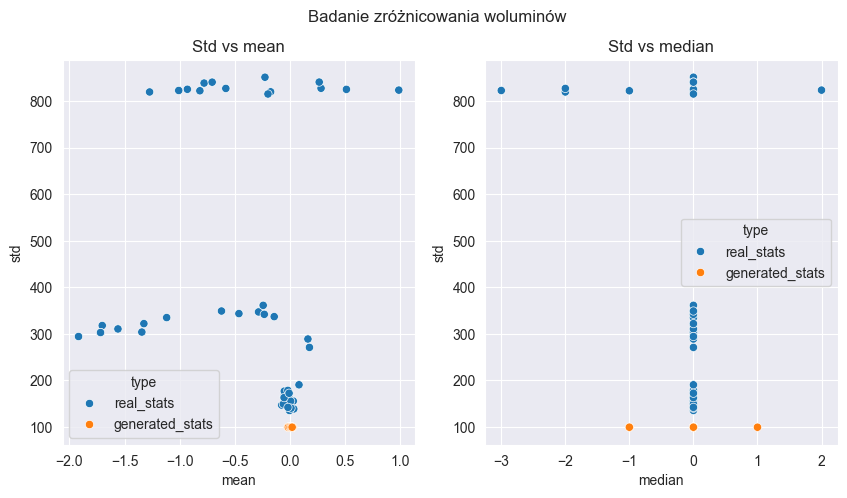

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Badanie zróżnicowania woluminów")
sns.scatterplot(df, ax=axes[0], x="mean", y="std", hue="type").set_title("Std vs mean")
sns.scatterplot(df, ax=axes[1], x="median", y="std", hue="type").set_title("Std vs median")
plt.show()

### Wnioski:
- sztuczne dane są mniej zróżnicowane zarówno ze względu na odchylenie, jak i średnią
- dane ze względu na odchylenie standardowe możemy podzielić woluminy na grupy:
    - ...<~100 - dane wygenerowane
    - 100<...<200 - prawdziwe dane o bardzo niezróżnicowanej średniej
    - 200<...<400 - prawdziwe dane o zróżnicowanej średniej lecz tej samej medianie (wartości skrajne?)
    - 800<... - prawdziwe dane o zróżnicowanej średniej i medianie
        
Generalnie różne odchylenia i średnie nie stanowią problemu, gdyż przeprowadzamy normalizację, ale warto przyjrzeć się z czego one wynikają.
Idźmy zatem tym tropem (uznając tę cechę za wartą eksploracji) i zadajmy pytanie: czy te grupy różnią się licznością?


In [31]:
gr_1 = df[df['std'] < 100]
print(f" Grupa 1 - wygenerowane - {len(gr_1)}")
gr_2 = df[(df['std'] < 200) & (df['std'] > 100)]
print(f" Grupa 2 - niezróżnicowane - {len(gr_2)}")
gr_3 = df[(df['std'] < 400) & (df['std'] > 200)]
print(f" Grupa 3 - zróżnicowana średnia  - {len(gr_3)}")
gr_4 = df[df['std'] > 800]
print(f" Grupa 3 - zróżnicowana średnia  - {len(gr_4)}")
print(f"Czy łączna liczność się zgadza? - {len(gr_1) + len(gr_2) + len(gr_3) + len(gr_4) == len(df)}")

NameError: name 'df' is not defined

Grupy różnią się nieco licznością.

Generalnie jednak przy generowaniu woluminów konkursowych, tj. z brakującym fragmentem woluminy są poddawane pewnej transformacji z wypłaszczeniem wartości skrajnych i pewną normalizacją wartości w woluminach do zakresu 0-255. Skoro wszystkie dane i tak będą przetwarzane, warto przyjrzeć się jak po transformacji będą one wyglądały.

In [32]:
def clip_seismic(seismic):
    minval = np.percentile(seismic, 2)
    maxval = np.percentile(seismic, 98)
    seismic = np.clip(seismic, minval, maxval)
    seismic = ((seismic - minval) / (maxval - minval)) * 255
    return seismic

def get_clip_image_stats(nifti_image):
    image_array = clip_seismic(np.array(nifti_image.dataobj))
    return {"mean": image_array.mean(),
            "std": image_array.std(),
            "median": np.median(image_array),
            "data": nifti_image.dataobj}

def get_clip_stats(data_directory):
    return [get_clip_image_stats(nib.load(path)) for path in list(data_directory.glob("*.nii.gz"))]

In [8]:
real_stats_clip = get_clip_stats(train_real_dir)
generated_stats_clip = get_clip_stats(train_generated_dir)

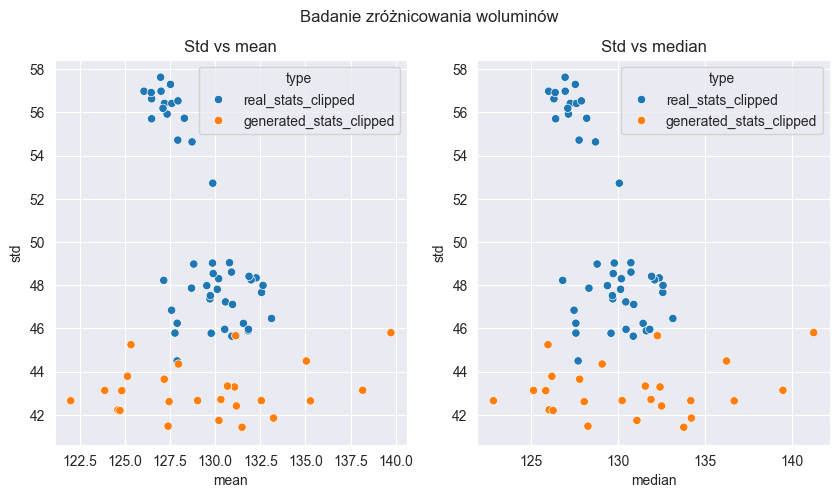

In [33]:
real_df_clip = pd.DataFrame(real_stats_clip)
real_df_clip['type'] = 'real_stats_clipped'
generated_df_clip = pd.DataFrame(generated_stats_clip)
generated_df_clip['type'] = 'generated_stats_clipped'
df_clip = pd.concat([real_df_clip, generated_df_clip])
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Badanie zróżnicowania woluminów")
sns.scatterplot(df_clip, ax=axes[0], x="mean", y="std", hue="type").set_title("Std vs mean")
sns.scatterplot(df_clip, ax=axes[1], x="median", y="std", hue="type").set_title("Std vs median")
plt.show()

I o dziwo teraz to wygenerowane dane są bardziej rozbieżne pod kątem średniej, natomiast grupy prawdziwe zbiegają ku podobnym wartościom. Brakuje też outsiderów/outsidera, którego odchylenie znacznie odbiegało od reszty.

# Co to oznacza?
Dane prawdziwe posiadały wartości skrajne, które w zadaniu konkursowym są neutralizowane. Woluminy sztuczne są dalej mniej zróżnicowane wewnętrznie (mniejsze odchylenie), a prawdziwe - bardziej.
Wartości te oczywiście po normalizacji nie będą wpływały na trening, jeżeli rozkłady są podobne. Różne grupy mówią nam jednak coś o zbiorze badanych danych, warto więc zweryfikować co to oznacza, przyglądając się z bliska woluminom.

# Ale najpierw badamy rozkłady

In [74]:
real_sample = df_clip[df_clip['type'] == 'real_stats_clipped'].sort_values(by='mean')

In [75]:
real_sample

mean        std      median  \
8   126.046165  56.982132  126.040355   
20  126.446099  56.923417  126.413352   
26  126.467966  55.707162  126.441616   
9   126.470619  56.633236  126.343537   
38  126.968344  57.630639  126.985591   
4   126.992807  56.982651  126.992321   
41  127.100645  56.191507  127.136338   
37  127.141963  48.225808  126.847826   
5   127.183591  56.420219  127.284142   
16  127.328733  55.924752  127.175756   
44  127.516665  57.298677  127.571469   
0   127.577168  46.844068  127.500000   
10  127.589169  56.417649  127.641824   
33  127.763497  45.786226  127.604594   
34  127.884696  44.498541  127.733374   
47  127.887017  46.240511  127.602740   
6   127.920819  54.719361  127.789937   
21  127.929934  56.535791  127.920561   
28  128.284525  55.730588  128.224020   
30  128.681895  47.864212  128.355705   
14  128.710324  54.637782  128.731161   
18  128.804083  48.980797  128.826152   
36  128.804083  48.980797  128.826152   
11  129.528146  47.983478  129.415693   
35  129.701567  47.369962  129.723275   
40  129.726036  47.519276  129.701727   
32  129.773681  45.777676  129.623779   
24  129.773681  45.777676  129.623779   
12  129.843032  49.028109  129.810544   
2   129.859921  52.725361  130.099418   
46  129.882834  48.540996  129.748982   
13  130.110504  47.810376  130.173536   
3   130.188040  48.302564  130.221037   
22  130.522470  45.960962  130.486486   
7   130.563382  47.229946  130.473251   
43  130.788266  49.044601  130.764158   
29  130.899273  48.607394  130.769231   
1   130.917851  45.642062  130.902160   
19  130.956462  47.113025  130.928297   
25  131.558537  46.235378  131.468200   
27  131.819929  45.892167  131.651865   
23  131.819929  45.892167  131.651865   
45  131.839516  45.960157  131.850000   
49  131.870220  48.414305  131.955075   
48  131.988009  48.249788  132.129888   
15  132.264142  48.341628  132.396603   
31  132.264142  48.341628  132.396603   
17  132.564939  47.667757  132.600000   
39  132.647233  47.992252  132.612028   
42  133.118680  46.461422  133.178138   

                                                 data                type  
8   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
20  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
26  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
9   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
38  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
4   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
41  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
37  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
5   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
16  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
44  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
0   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
10  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
33  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
34  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
47  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
6   <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
21  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
28  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
30  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
14  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
18  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
36  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
11  <nibabel.arrayproxy.ArrayProxy object at 0x000...  real_stats_clipped  
35  <nibabel.array

In [76]:
samples_real = [real_sample.iloc[0], real_sample.iloc[25], real_sample.iloc[-1]]

Wybieramy ręcznie woluminy z różnymi średnimi i odchyleniami.

In [79]:
real_sample = df_clip[df_clip['type'] == 'real_stats_clipped'].sort_values(by='std')
samples_real = samples_real + [real_sample.iloc[0], real_sample.iloc[25], real_sample.iloc[-1]]

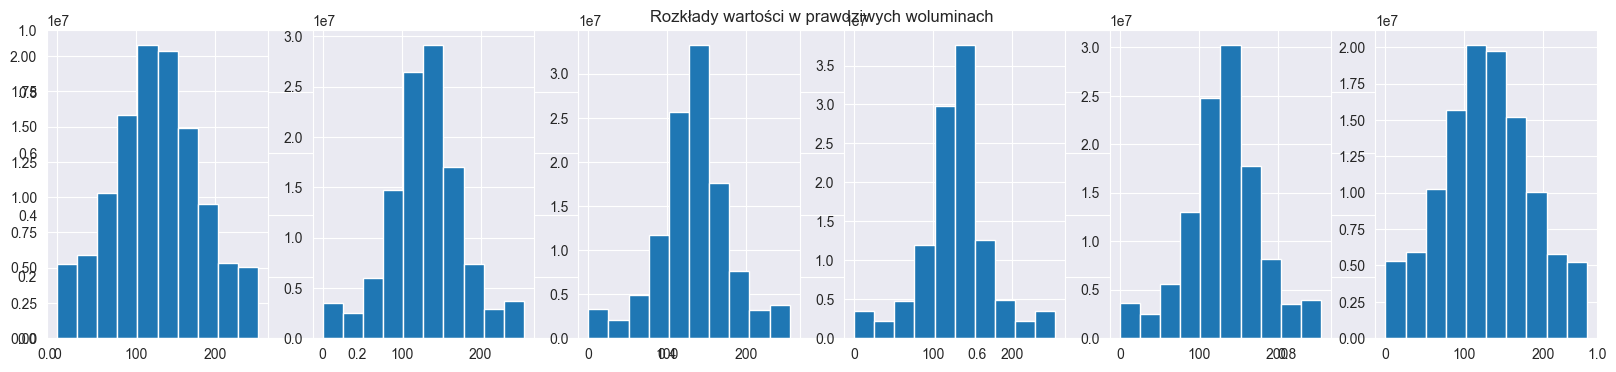

In [93]:
plt.figure(figsize=(20,4))
plt.title('Rozkłady wartości w prawdziwych woluminach')
for i, sample in enumerate(samples_real):
    plt.subplot(1,len(samples_real),i+1)
    plt.hist(clip_seismic(np.array(sample['data']).flatten()))

Generalnie nie ma tu nic odkrywczego.

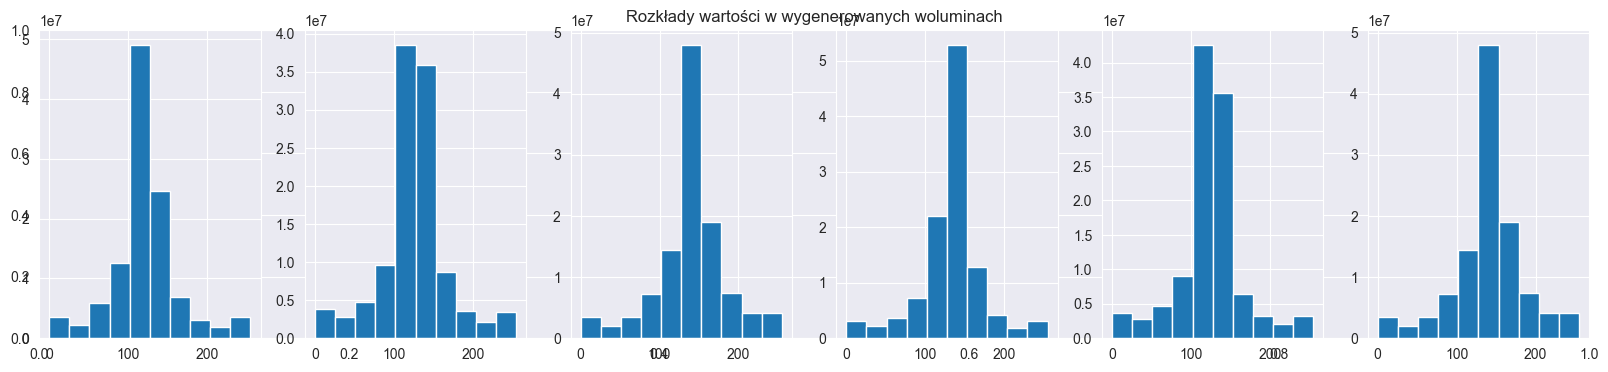

In [94]:
generated_sample = df_clip[df_clip['type'] == 'generated_stats_clipped'].sort_values(by='mean')
samples_gen = [generated_sample.iloc[0], generated_sample.iloc[5], generated_sample.iloc[-1]]
generated_sample = generated_sample.sort_values(by='std')
samples_gen = samples_gen + [generated_sample.iloc[0], generated_sample.iloc[5], generated_sample.iloc[-1]]
plt.figure(figsize=(20, 4))
plt.title('Rozkłady wartości w wygenerowanych woluminach')
for i, sample in enumerate(samples_gen):
    plt.subplot(1, len(samples_real), i + 1)
    plt.hist(clip_seismic(np.array(sample['data']).flatten()))

Widoczne jest potwierdzenie poprzednio zaobserwowanej właściwości, że dane sztuczne mają mniejsze odchylenia, tj. są bardziej scentrowane wokół średniej.

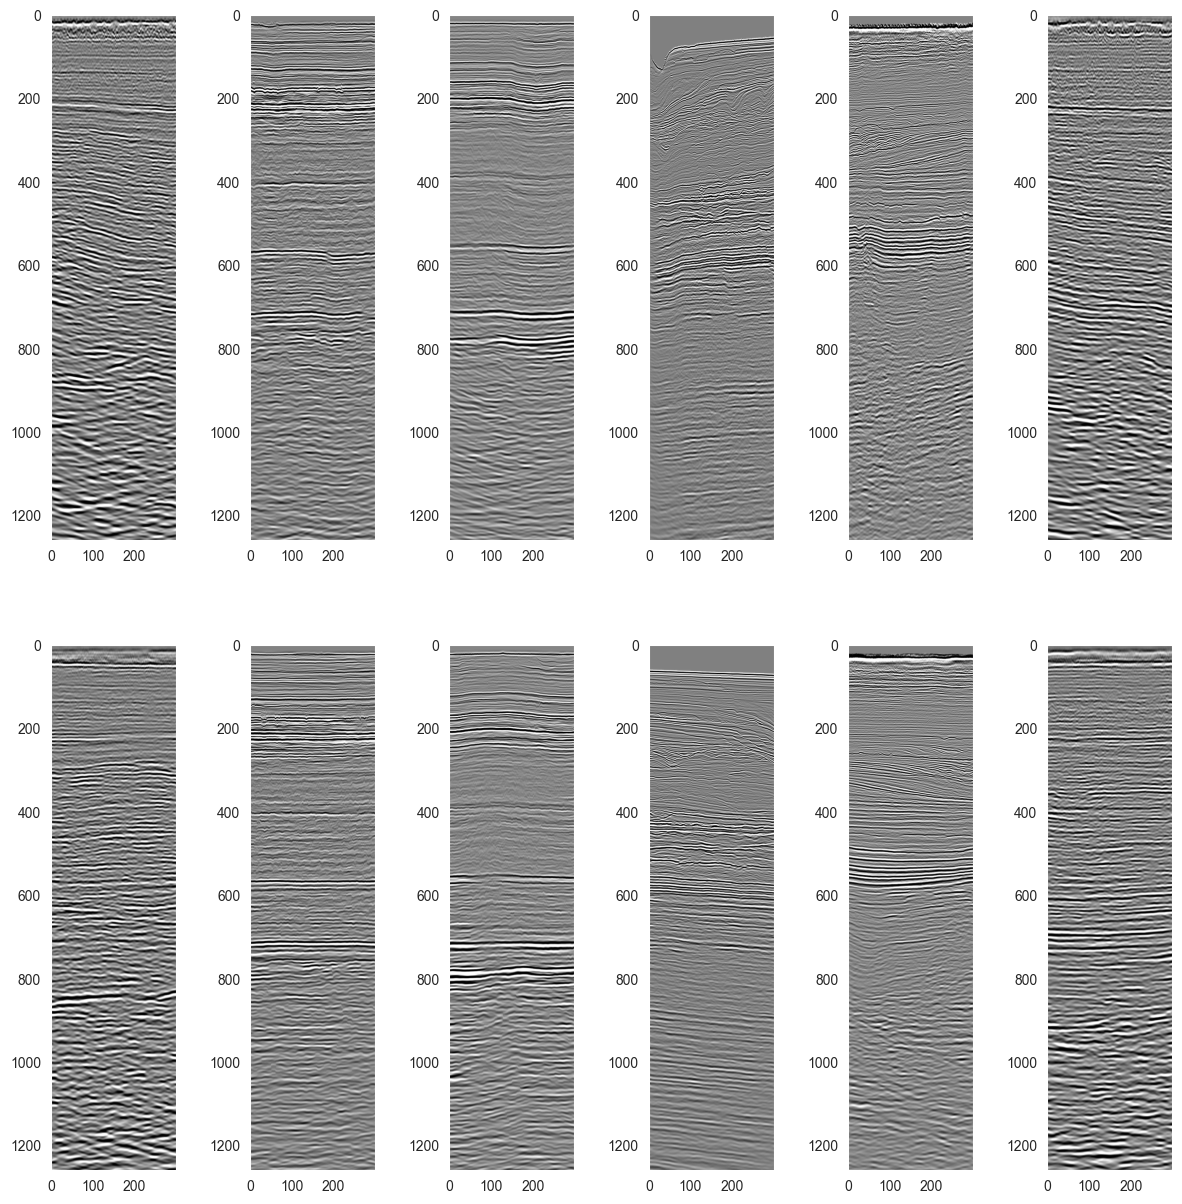

In [137]:
fig, axes = plt.subplots(2, len(samples_real), figsize=(15,15))
for i, sample in enumerate(samples_real):
    clipped = clip_seismic(np.array(sample['data']))
    axes[0][i].imshow(clipped.transpose()[:,150,:], cmap='gray')
    axes[0][i].grid(None)
    axes[1][i].imshow(clipped.transpose()[...,150],cmap='gray')
    axes[1][i].grid(None)

Ciekawa jest szczególnie różnica woluminów 4. i 6. - ze względu na odchylenie standardowe. Widzimy, że wolumin o większym odchyleniu (6.) jest mniej *gładki*, występują  w nim szersze szramy.

# Grupa o najwyższym odchyleniu

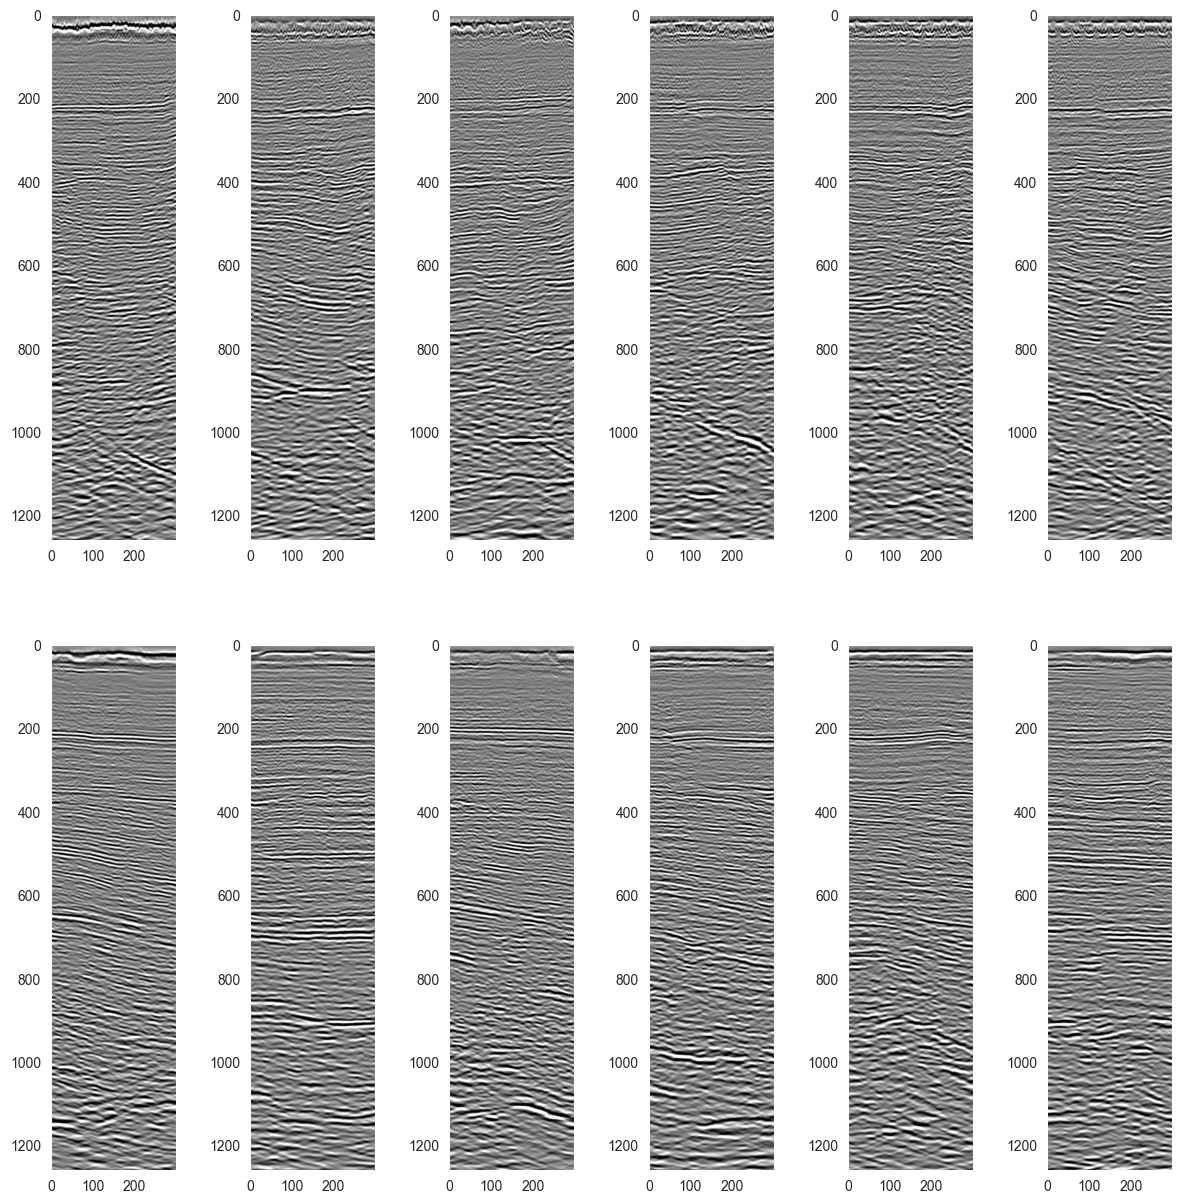

In [152]:
group_samples = df_clip[df_clip['std'] > 54].sample(6).values.tolist()
fig, axes = plt.subplots(2, len(group_samples), figsize=(15,15))
for i, sample in enumerate(group_samples):
    clipped = clip_seismic(np.array(sample[3]))
    axes[0][i].imshow(clipped.transpose()[:,150,:], cmap='gray')
    axes[0][i].grid(None)
    axes[1][i].imshow(clipped.transpose()[...,150],cmap='gray')
    axes[1][i].grid(None)

Generalnie widzimy, że te woluminy są do siebie dosyć podobne. Po charakterystycznym szczycie początek jest gładszy, natomiast im *głębiej*, tym bardziej istotne są wybrzuszenia. Widzimy również, że przekroje przez osie *x* i *y* są bardzo podobne.

# Grupa o niższym odchyleniu

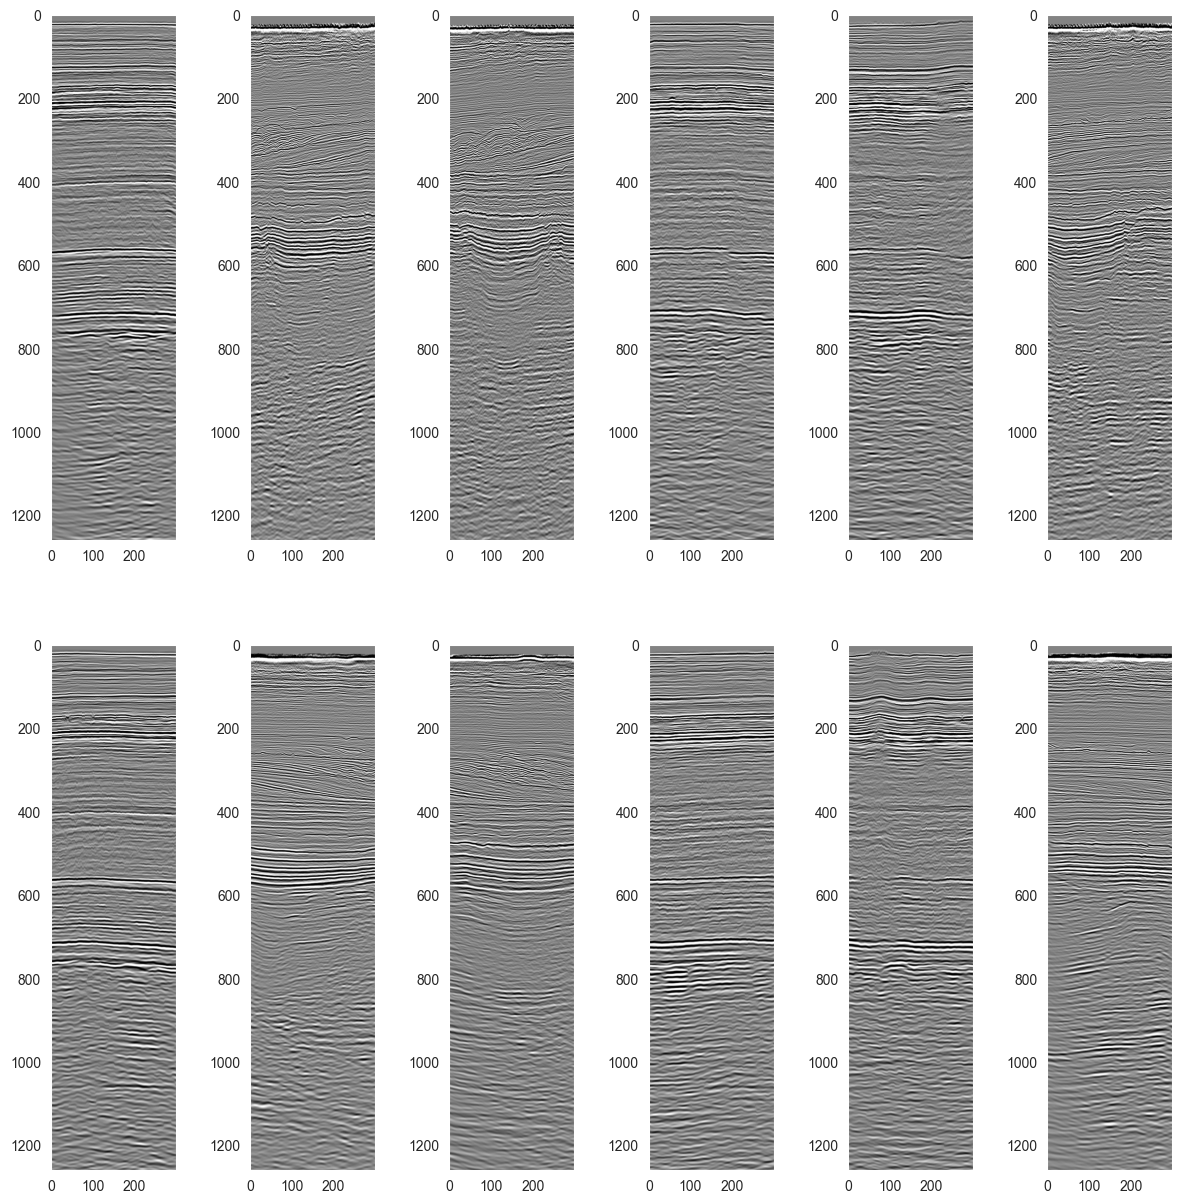

In [159]:
group_samples = df_clip[(df_clip['std'] > 47) & (df_clip['std'] < 50)].sample(6).values.tolist()
fig, axes = plt.subplots(2, len(group_samples), figsize=(15,15))
for i, sample in enumerate(group_samples):
    clipped = clip_seismic(np.array(sample[3]))
    axes[0][i].imshow(clipped.transpose()[:,150,:], cmap='gray')
    axes[0][i].grid(None)
    axes[1][i].imshow(clipped.transpose()[...,150],cmap='gray')
    axes[1][i].grid(None)

Te woluminy wydają się gładsze, a wybrzuszenia pojawiają się lokalnie na całej głębokości.

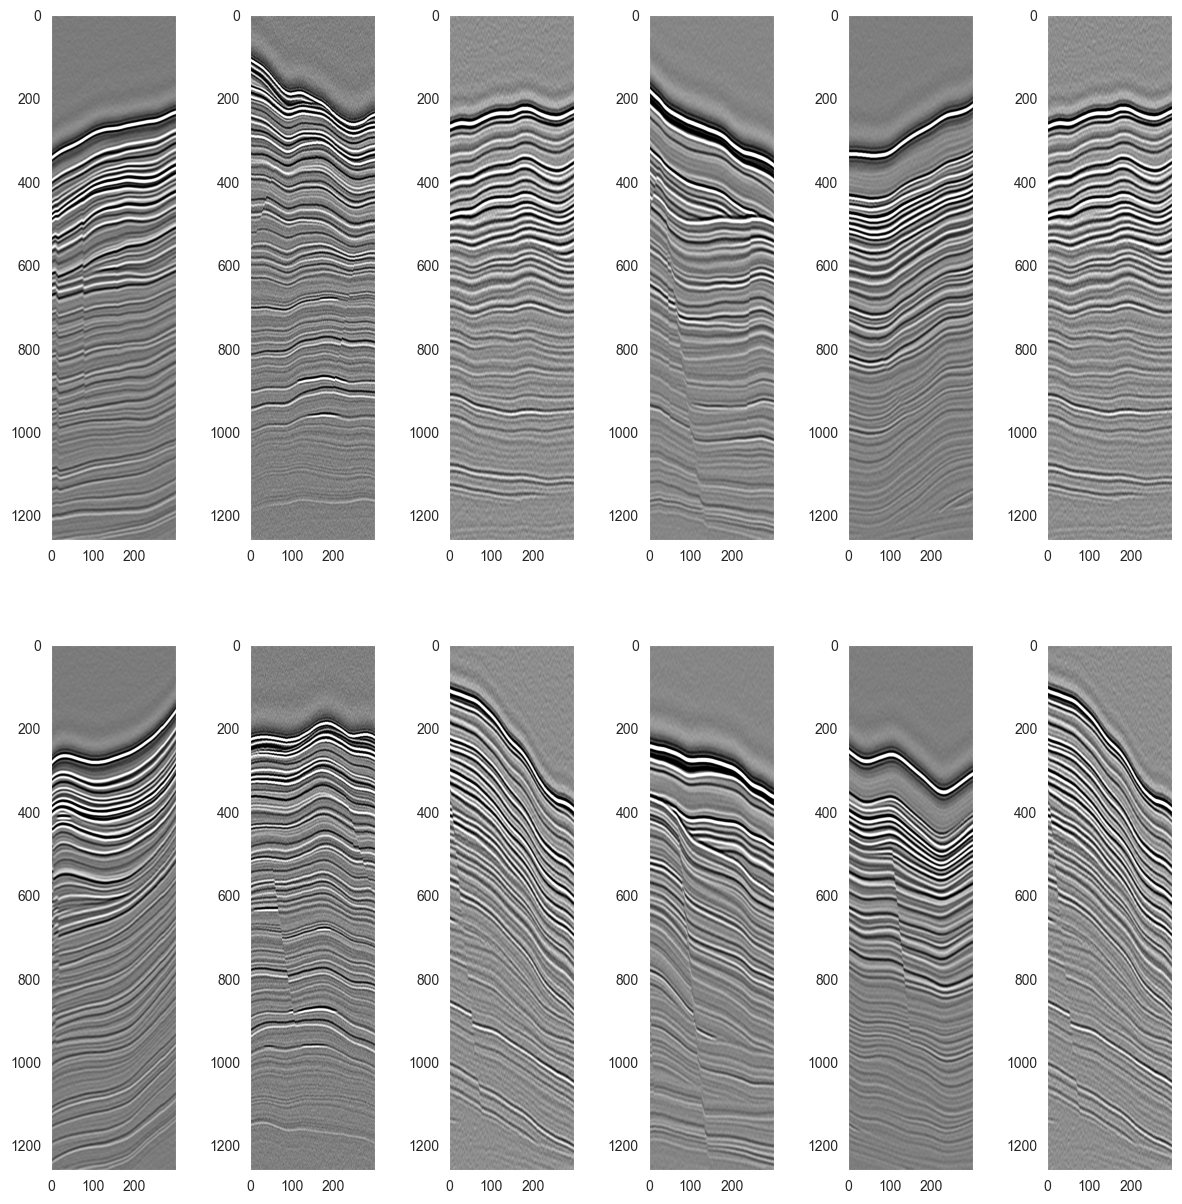

In [161]:
fig, axes = plt.subplots(2, len(samples_gen), figsize=(15,15))
for i, sample in enumerate(samples_gen):
    clipped = clip_seismic(np.array(sample['data']))
    axes[0][i].imshow(clipped.transpose()[:,150,:], cmap='gray')
    axes[0][i].grid(None)
    axes[1][i].imshow(clipped.transpose()[...,150],cmap='gray')
    axes[1][i].grid(None)

Te woluminy wydają się być z kosmosu. Zdaje się, że warstwy są tu bardziej pochyłe niż w rzeczywistych woluminach, przez co są one bardziej zróżnicowane poziomo, tj. spodziewamy się, że przekroje w osi *z* będą ciekawsze.

# Podsumowanie:
Wydaje się, że poziomo woluminy są bardziej przewidywalne niż pionowo, tj. wycinając fragment w osi *x* lub *y* możemy z większym prawdopodobieństwem *zgadnąć* co kryje się w wyciętym fragmentem (połączenie rozdzielonych fragmentów, ew. ich przedłużenie). Tzw. przeze mnie *wybrzuszenia*, a w rzeczywistości pewnie jakieś warstwy pozwalają nam się połączyć w sposób dosyć oczywisty. Jeśli chodzi natomiast o wycięcia w osi *z*, tj. po głębokości trudno nam zgadnąć. Niektóre warstwy możemy przedlużyć, szczególnie gdy są ukośne, generalnie wydaje się też, że czasem im niżej tym więcej wybrzuszeń, ale trudno przewidzieć. 